In [1]:
include("../init-notebook.jl")

(section-linsys-polyinterp)=
# Polynomial interpolation

```{index} interpolation
```

The United States carries out a census of its population every 10 years. Suppose we want to know the population at times in-between the census years, or to estimate future populations. One technique is to find a polynomial that passes through all of the data points.[^census]

(definition-polyinterp-polyinterp)=
::::{proof:definition} Polynomial interpolation
Given $n$ points $(t_1,y_1),\ldots,(t_n,y_n)$, where the $t_i$ are all distinct, the **polynomial interpolation** problem is to find a polynomial $p$ of degree less than $n$ such that $p(t_i)=y_i$ for all $i$.
::::

As stated in {numref}`Definition {number} <definition-polyinterp-polyinterp>`, the polynomial interpolation problem has a unique solution. Once an the interpolating polynomial is found, it can be evaluated anywhere to estimate or predict values. 

[^census]: We're quite certain that the U.S. Census Bureau uses more sophisticated modeling techniques than the one we present here!

## Interpolation as a linear system

Given data $(t_i,y_i)$ for $i=1,\ldots,n$, we seek a polynomial

```{math}
:label: vanderinterp
p(t) = c_1 + c_{2} t + c_3t^2 +  \cdots + c_{n} t^{n-1},
```

such that $y_i=p(t_i)$ for all $i$. These conditions are used to determine the coefficients $c_1\ldots,c_n$:

```{math}
\begin{split}
 c_1 + c_2 t_1 + \cdots + c_{n-1}t_1^{n-2} + c_nt_1^{n-1} &= y_1 \\
 c_1 + c_2 t_2 + \cdots + c_{n-1}t_2^{n-2} + c_nt_2^{n-1} &= y_2 \\
 c_1 + c_2 t_3 + \cdots + c_{n-1}t_3^{n-2} + c_nt_3^{n-1} &= y_3 \\
 \vdots \qquad & \\
 c_1 + c_2 t_n + \cdots + c_{n-1}t_n^{n-2} + c_nt_n^{n-1} &= y_n 
 \end{split}
```

These equations form a linear system for the coefficients $c_i$:

```{math}
  :label: vandersystem
  \begin{bmatrix}
    1 & t_1 & \cdots & t_1^{n-2} & t_1^{n-1} \\
    1 & t_2 & \cdots & t_2^{n-2} & t_2^{n-1} \\
    1 & t_3 & \cdots & t_3^{n-2} & t_3^{n-1} \\
    \vdots & \vdots &  & \vdots & \vdots \\
    1 & t_n & \cdots & t_n^{n-2} & t_n^{n-1} \\
  \end{bmatrix}
  \begin{bmatrix}
    c_1  \\
    c_2  \\
    c_3 \\
    \vdots \\
    c_n
  \end{bmatrix}
  =
  \begin{bmatrix}
    y_1  \\
    y_2  \\
    y_3 \\
    \vdots \\
    y_n
  \end{bmatrix},
```

```{index} ! Vandermonde matrix
```

or more simply, $\mathbf{V} \mathbf{c} = \mathbf{y}$. The matrix $\mathbf{V}$ is of a
special type.

::::{proof:definition} Vandermonde matrix
Given distinct values $t_1,\ldots,t_n$, a **Vandermonde matrix** for these values is the $n\times n$ matrix appearing in {eq}`vandersystem`.
::::

Polynomial interpolation can therefore be posed as a linear system of equations with a Vandermonde matrix.

````{attention}
Recall that the demos in this and later chapters omit the statement

```
using FundamentalsNumericalComputation
``` 

that is needed to run some of the statements.
````

(demo-interp-vander)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

We create two vectors for data about the population of China. The first has the years of census data, the other has the population, in millions of people.

In [2]:
year = [1982,2000,2010,2015] 
pop = [1008.18, 1262.64, 1337.82, 1374.62];

:::{index} ! Julia; .-, ! Julia; .+
:::

:::{index} Julia; broadcasting
:::

::::{panels}
:column: col-7 left-side
:card: border-0 shadow-none
```{raw} latex
\begin{minipage}[t]{0.5\textwidth}
```
It's convenient to measure time in years since 1980. We use `.-` to subtract a scalar from a vector elementwise. We will also use a floating-point value in the subtraction, so the result is also in double precision.

```{raw} latex
\end{minipage}\hfill
```
---
:column: col-5 right-side
:card: shadow-none comment 
```{raw} latex
\begin{minipage}[t]{0.4\textwidth}\begin{mdframed}[default]\small
```
A dotted operator such as `.-` or `.*` acts elementwise, broadcasting scalar values to match up with elements of an array.
```{raw} latex
\end{mdframed}\end{minipage}
```
::::

In [3]:
t = year .- 1980.0
y = pop;

:::{index} ! Julia; comprehension
:::

::::{panels}
:column: col-7 left-side
:card: border-0 shadow-none
```{raw} latex
\begin{minipage}[t]{0.5\textwidth}
```
Now we have four data points $(t_1,y_1),\dots,(t_4,y_4)$, so $n=4$ and we seek an interpolating cubic polynomial. We construct the associated Vandermonde matrix:

```{raw} latex
\end{minipage}\hfill
```
---
:column: col-5 right-side
:card: shadow-none comment 
```{raw} latex
\begin{minipage}[t]{0.4\textwidth}\begin{mdframed}[default]\small
```

An expression inside square brackets and ending with a `for` statement is called a **comprehension**. It's often an easy and readable way to construct vectors and matrices. 
```{raw} latex
\end{mdframed}\end{minipage}
```
::::

In [4]:
V = [ t[i]^j for i=1:4, j=0:3 ]

4×4 Matrix{Float64}:
 1.0   2.0     4.0      8.0
 1.0  20.0   400.0   8000.0
 1.0  30.0   900.0  27000.0
 1.0  35.0  1225.0  42875.0

:::{index} ! Julia; \\
:::

::::{panels}
:column: col-7 left-side
:card: border-0 shadow-none
```{raw} latex
\begin{minipage}[t]{0.5\textwidth}
```
To solve for the vector of polynomial coefficients, we use a backslash to solve the linear system:
```{raw} latex
\end{minipage}\hfill
```
---
:column: col-5 right-side
:card: shadow-none comment
```{raw} latex
\begin{minipage}[t]{0.4\textwidth}\begin{mdframed}[default]\small
```
A **backslash** `\` is used to solve a linear system of equations.
```{raw} latex
\end{mdframed}\end{minipage}
```
::::

In [5]:
c = V \ y

4-element Vector{Float64}:
 962.2387878787877
  24.12775468975476
  -0.592262049062053
   0.006843867243867301

The algorithms used by the backslash operator are the main topic of this chapter. As a check on the solution, we can compute the *residual*.

In [6]:
y - V*c

4-element Vector{Float64}:
 0.0
 0.0
 0.0
 2.2737367544323206e-13

Using floating-point arithmetic it is not realistic to expect exact equality of quantities; a relative difference comparable to $\macheps$ is all we can look for.

::::{panels}
:column: col-7 left-side
:card: border-0 shadow-none
```{raw} latex
\begin{minipage}[t]{0.5\textwidth}
```
By our definitions, the elements of `c` are coefficients in ascending-degree order for the interpolating polynomial. We can use the polynomial to estimate the population of China in 2005:

```{raw} latex
\end{minipage}\hfill
```
---
:column: col-5 right-side
:card: shadow-none comment
```{raw} latex
\begin{minipage}[t]{0.4\textwidth}\begin{mdframed}[default]\small
```
The `Polynomials` package has functions to make working with polynomials easy and efficient.
```{raw} latex
\end{mdframed}\end{minipage}
```
::::

In [7]:
p = Polynomial(c)    # construct a polynomial
p(2005-1980)         # include the 1980 time shift

1302.2043001443

The official population value for 2005 was 1303.72, so our result is rather good. 

:::{index} ! Julia; scatter
:::

::::{panels}
:column: col-7 left-side
:card: border-0 shadow-none
```{raw} latex
\begin{minipage}[t]{0.5\textwidth}
```
We can visualize the interpolation process. First, we plot the data as points. We'll shift the $t$ variable back to actual years.

```{raw} latex
\end{minipage}\hfill
```
---
:column: col-5 right-side
:card: shadow-none comment 
```{raw} latex
\begin{minipage}[t]{0.4\textwidth}\begin{mdframed}[default]\small
```
The `scatter` function creates a scatter plot of points; you can specify a line connecting the points as well.
```{raw} latex
\end{mdframed}\end{minipage}
```
::::

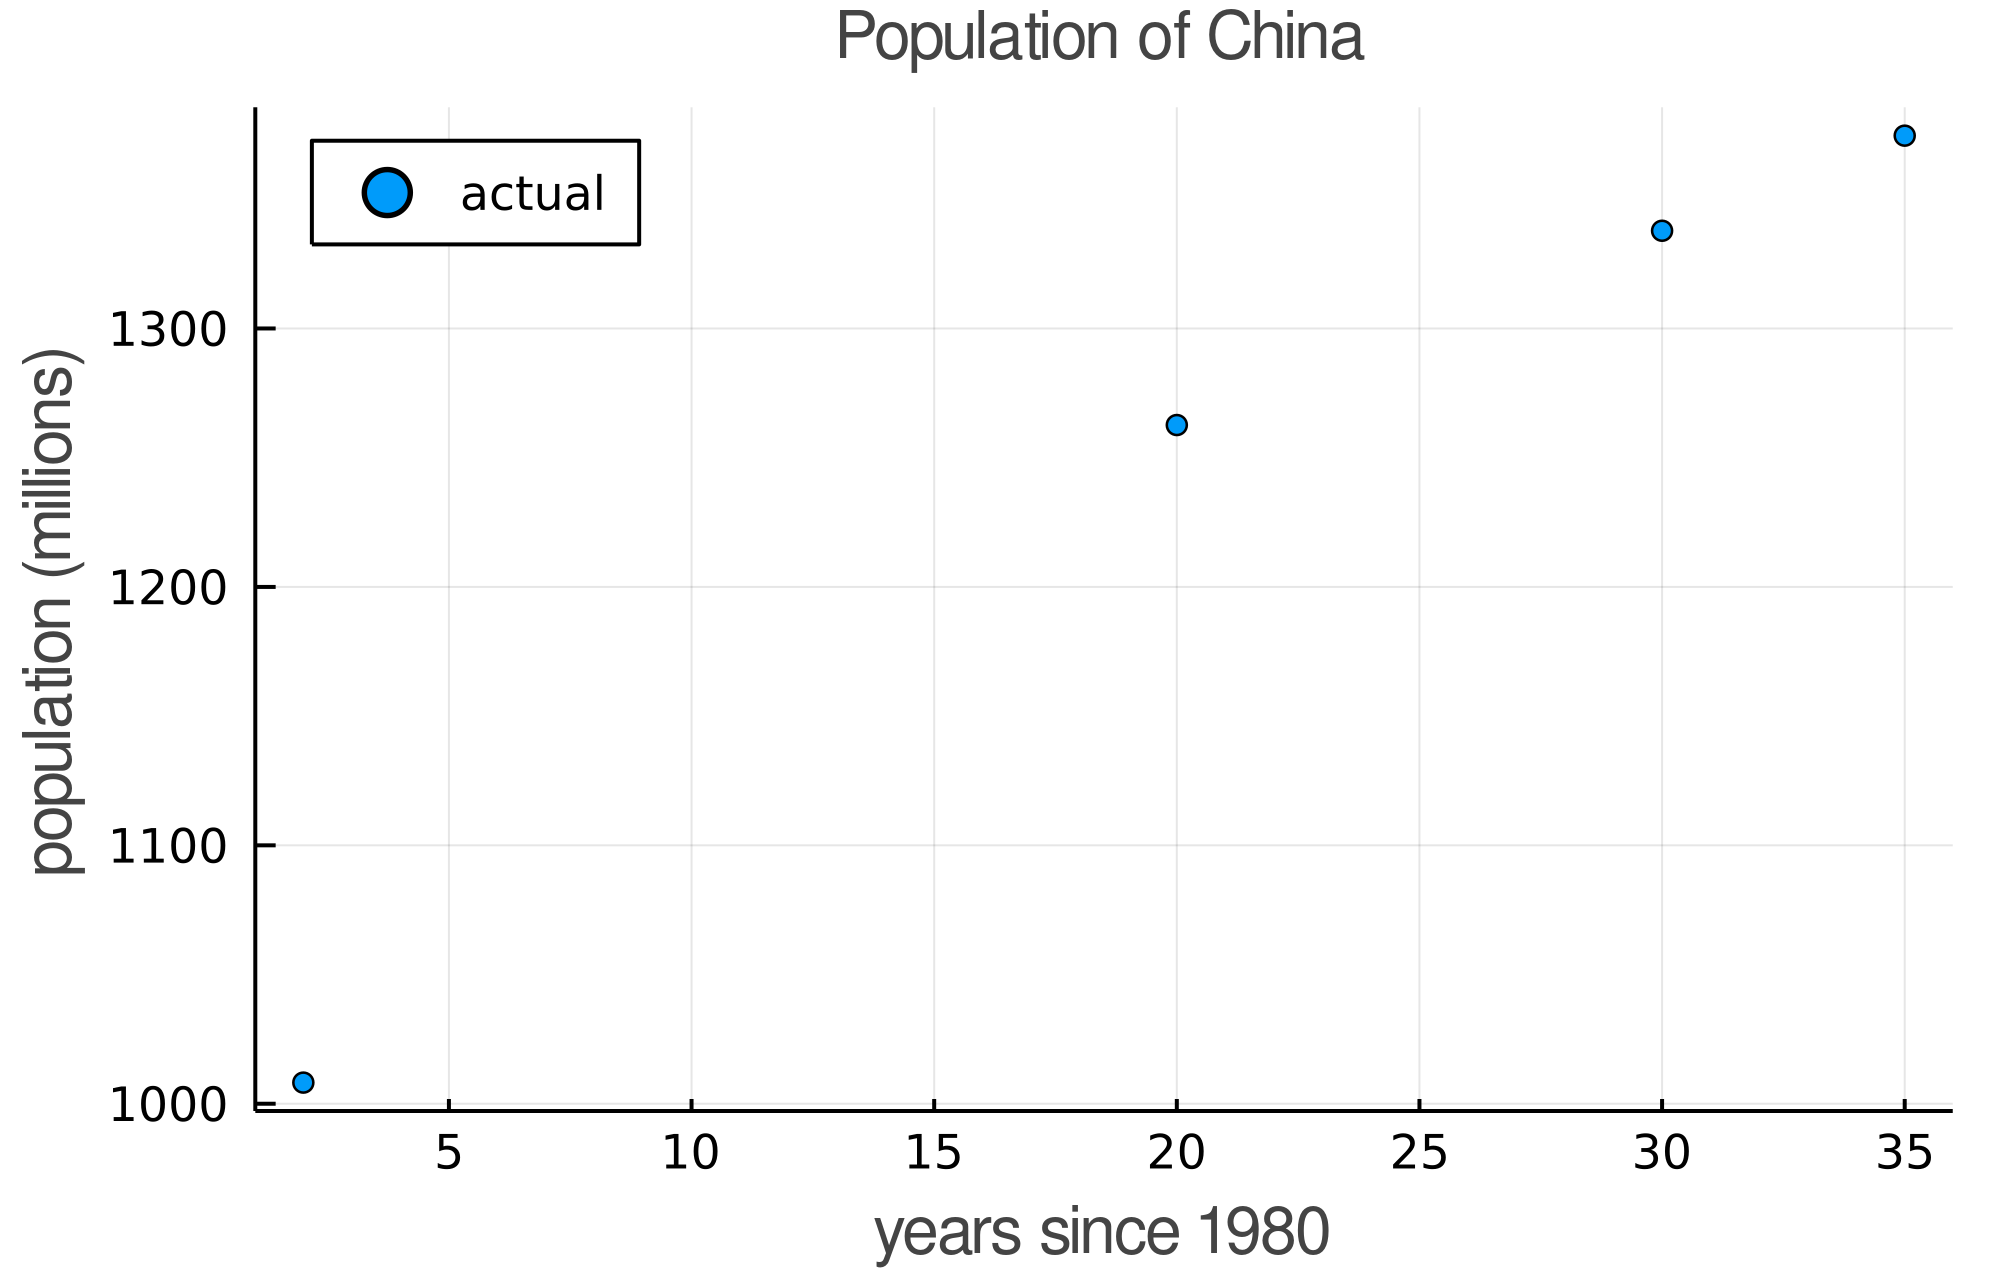

In [8]:
scatter(t,y, label="actual", legend=:topleft,
    xlabel="years since 1980", ylabel="population (millions)", 
    title="Population of China")

:::{index} Julia; range
:::

```{index} ! Julia; broadcasting
```

::::{panels}
:column: col-7 left-side
:card: border-0 shadow-none
```{raw} latex
\begin{minipage}[t]{0.5\textwidth}
```
We want to superimpose a plot of the polynomial. We do that by evaluating it at a vector of points in the interval. The dot after the name of the polynomial is a universal way to apply a function to every element of an array, a technique known as **broadcasting**.

```{raw} latex
\end{minipage}\hfill
```
---
:column: col-5 right-side
:card: shadow-none comment
```{raw} latex
\begin{minipage}[t]{0.4\textwidth}\begin{mdframed}[default]\small
```
The `range` function constructs evenly spaced values given the endpoints and either the number of values, or the step size between them.

Adding a dot to the end of a function name causes it to be broadcast, i. e., applied to every element of a vector or matrix.
```{raw} latex
\end{mdframed}\end{minipage}
```
::::

In [9]:
tt = range(0,35,length=500)   # 500 times from 0 to 30 years
yy = p.(tt)               # apply to all vector elements
@show yy[1:4];

yy[1:4] = [962.2387878787877, 963.92820399633, 965.611806828809, 967.2896105457507]


:::{index} ! Julia; \!
:::

::::{panels}
:column: col-7 left-side
:card: border-0 shadow-none
```{raw} latex
\begin{minipage}[t]{0.5\textwidth}
```
Now we use of `plot!` to add to the current plot, rather than replacing it.

```{raw} latex
\end{minipage}\hfill
```
---
:column: col-5 right-side
:card: shadow-none comment
```{raw} latex
\begin{minipage}[t]{0.4\textwidth}\begin{mdframed}[default]\small
```
The `plot` function plots lines connecting the given $x$ and $y$ values; you can also specify markers at the points.

By convention, functions whose names end with the bang `!` change the value or state of something, in addition to possibly returning output.
```{raw} latex
\end{mdframed}\end{minipage}
```
::::

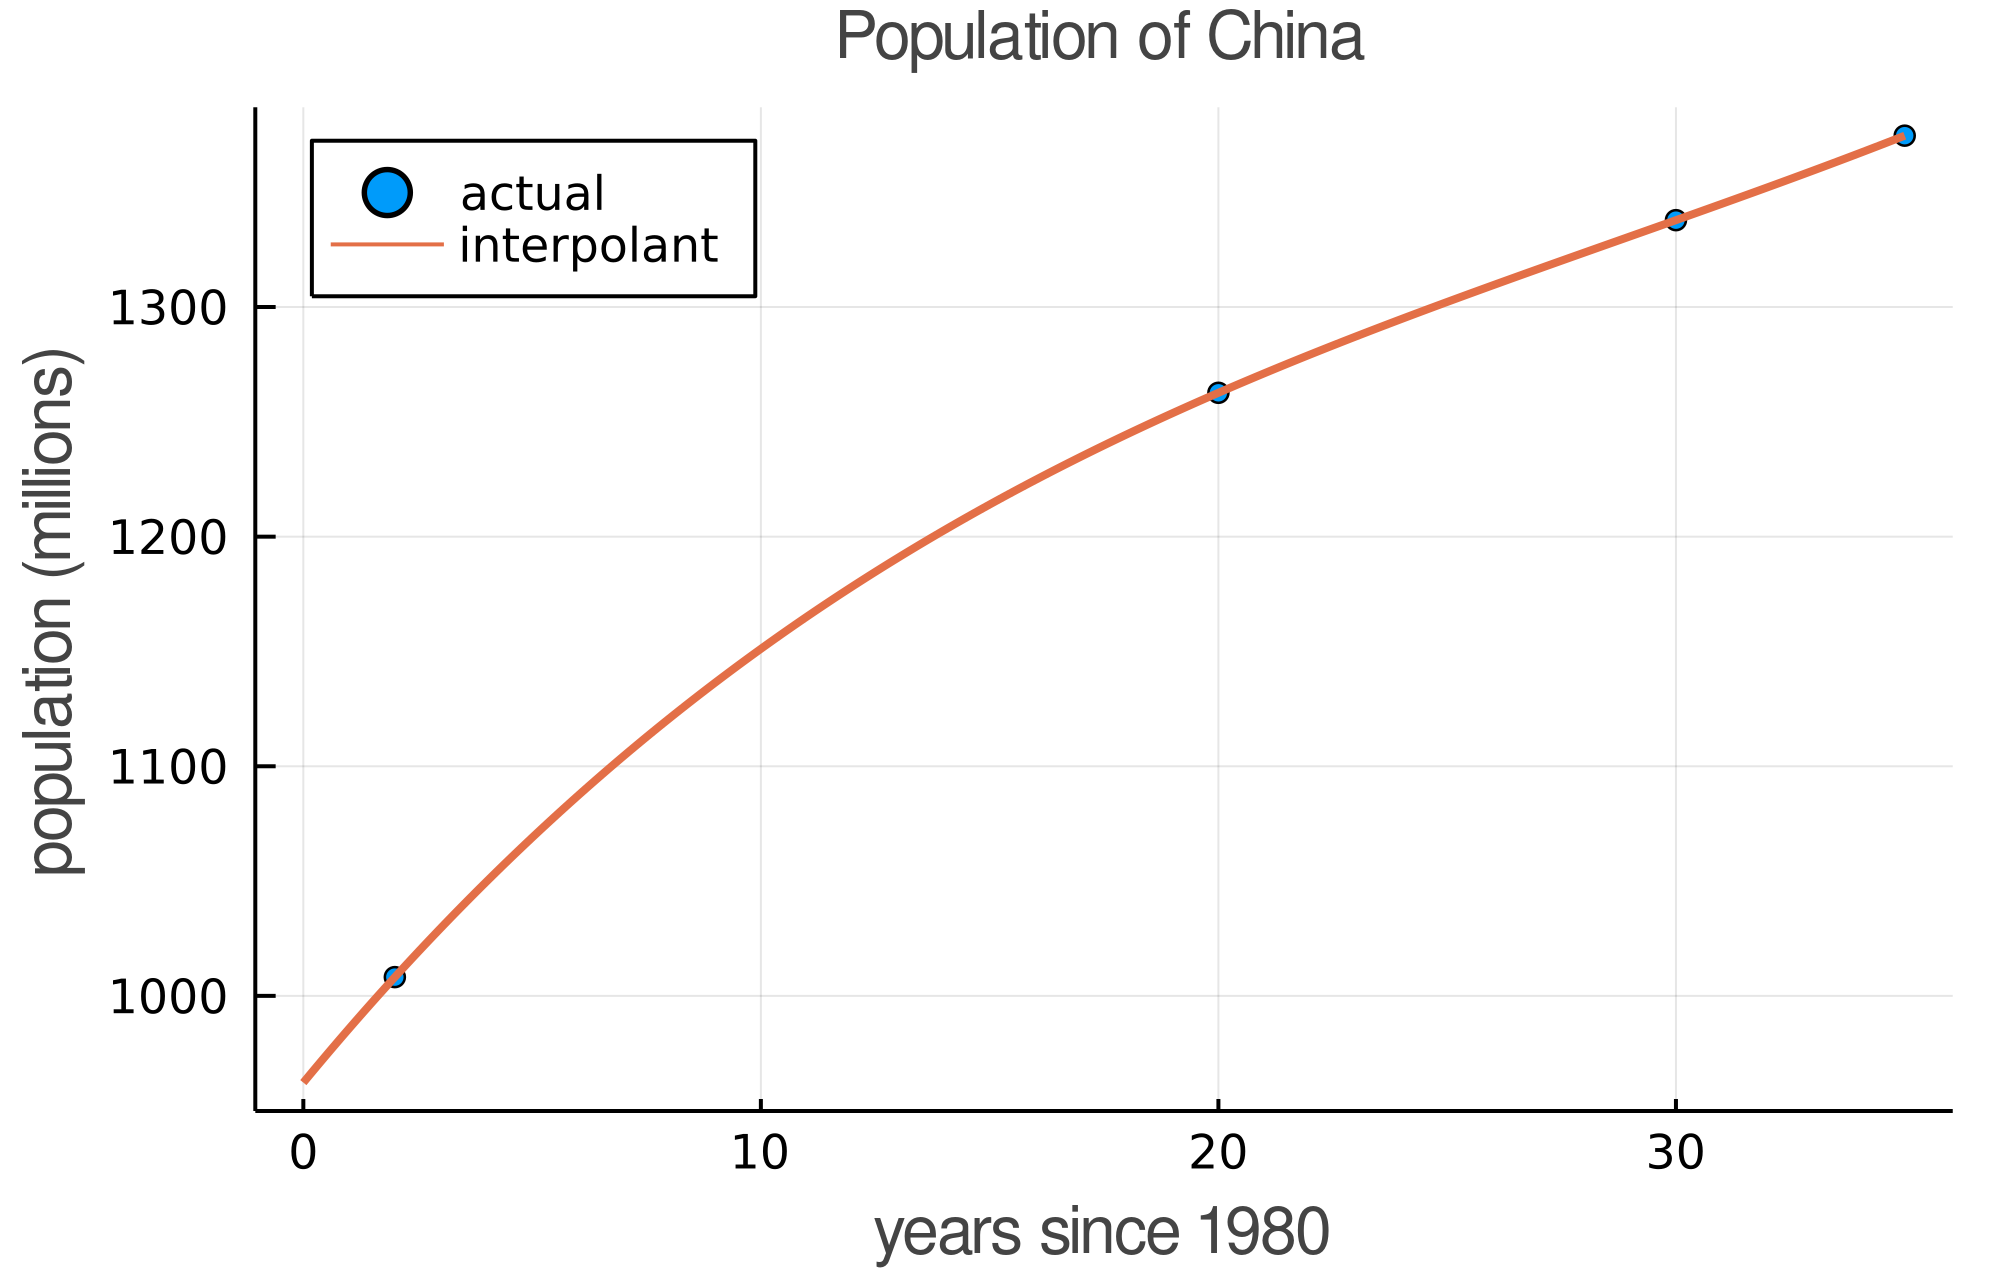

In [10]:
plot!(tt,yy,label="interpolant")

```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

## Exercises

1. Suppose you want to interpolate the points $(-1,0)$, $(0,1)$, $(2,0)$, $(3,1)$, and $(4,2)$ by a polynomial of as low a degree as possible.
  
   **(a)** ✍ What is the maximum degree of this polynomial?

   **(b)** ✍ Write out a linear system of equations for the coefficients of the interpolating polynomial.

   **(c)** ⌨ Use Julia to solve the system in (b) numerically.
  
2. 
    **(a)** ✍ Say you want to find a cubic polynomial $p$ such that $p(-1) =-2$, $p'(-1) =1$, $p(1) = 0$, and $p'(1) =-1$. (This is known as a *Hermite interpolant.*) Write out a linear system of equations for the coefficients of $p$. 
    
    **(b)** ⌨ Use Julia to solve the linear system in part (a), and make a plot of $p$ over $-1 \le x \le 1$. 

3. ⌨ Here are population figures (in millions) for three countries over a 30-year period (from *United Nations World Population Prospects*, 2019).

    |          | 1990  |  2000  | 2010 | 2020 |
    |:------:|:----------:|:---------:|:---------:|:---------:|
    | United States | 252.120	 | 281.711 | 309.011	|	331.003 |
    | India | 873.278	| 1,056.576	| 1,234.281	| 1,380.004 |
    | Poland | 37.960	| 38.557 | 38.330	| 37.847 |

    **(a)** Use cubic polynomial interpolation to estimate the population of the USA in 2005.

    **(b)** Use cubic polynomial interpolation to estimate when the population of Poland peaked during this time period.
  
    **(c)** Use cubic polynomial interpolation to make a plot of the Indian population over this period. Your plot should be well labeled and show a smooth curve as well as the original data points.
  
4. ⌨ Here are the official population figures for the state of Delaware, USA, every ten years from 1790 to 1900: 59096, 64273, 72674, 72749, 76748, 78085, 91532, 112216, 125015, 146608, 168493, 184735. For this problem, use 

    $$
    t = \frac{\text{year} - 1860}{10}
    $$

    as the independent (time) variable.

    **(a)** Using only the data from years 1860 to 1900, plot the interpolating polynomial over the same range of years. Add the original data points to your plot, as well.

    **(b)** You might assume that adding more data will make the interpolation better. But this is not always the case. Use all the data above to create an interpolating polynomial of degree 11, and then plot that polynomial over the range 1860 to 1900. In what way is this fit clearly inferior to the previous one? (This phenomenon is studied in [Chapter 9](../globalapprox/overview).)